#TP2: Segmentation des image
## DJAKAS Yawo Justin IDSIT, 3A.

1. Chargement  d'une image en niveaux de gris.

In [ ]:
# Installer les bibliothèques nécessaires si elles ne sont pas déjà installées
!pip install opencv-python-headless
!pip install matplotlib


In [ ]:
import cv2
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
# Charger une image depuis votre ordinateur
uploaded = files.upload()


Saving Voiture.jpeg to Voiture.jpeg


In [ ]:
# Récupérer le nom de fichier de l'image téléchargée
image_path = list(uploaded.keys())[0]

In [ ]:
# Charger l'image en niveaux de gris
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

2. Affichage de  l'image.

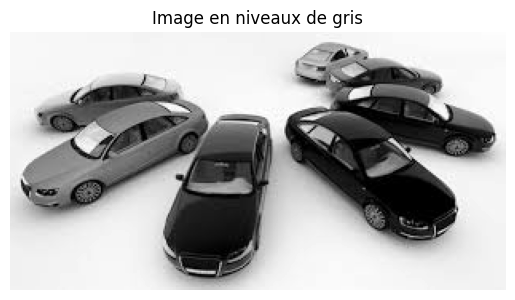

In [ ]:
# Afficher l'image en niveaux de gris
plt.imshow(image, cmap='gray')
plt.title('Image en niveaux de gris')
plt.axis('off')  # Désactiver les axes
plt.show()

3. Appliquons un seuil manuel de 128 pour segmenter l'image en deux
régions (objets et fond).

In [ ]:
# Appliquer un seuil manuel de 128
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)


4. Afficher l'image originale et l'image segmentée côte à côte.

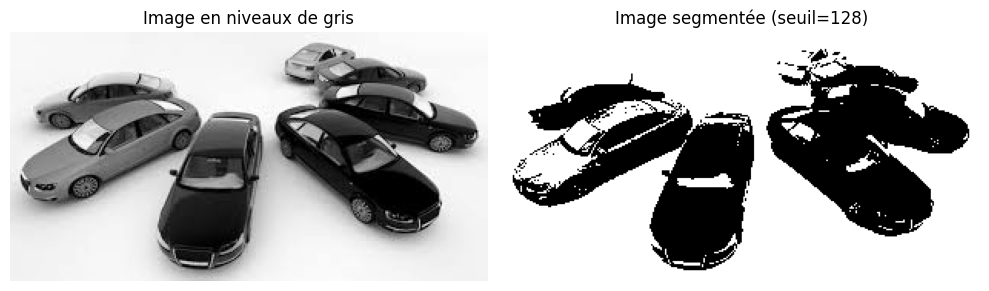

In [ ]:
# Créer une figure avec deux sous-plots côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Afficher l'image en niveaux de gris
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image en niveaux de gris')
axs[0].axis('off')

# Afficher l'image segmentée
axs[1].imshow(binary_image, cmap='gray')
axs[1].set_title('Image segmentée (seuil=128)')
axs[1].axis('off')

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


5. Varions le seuil manuellement entre 0 et 255 et observer les
résultats.

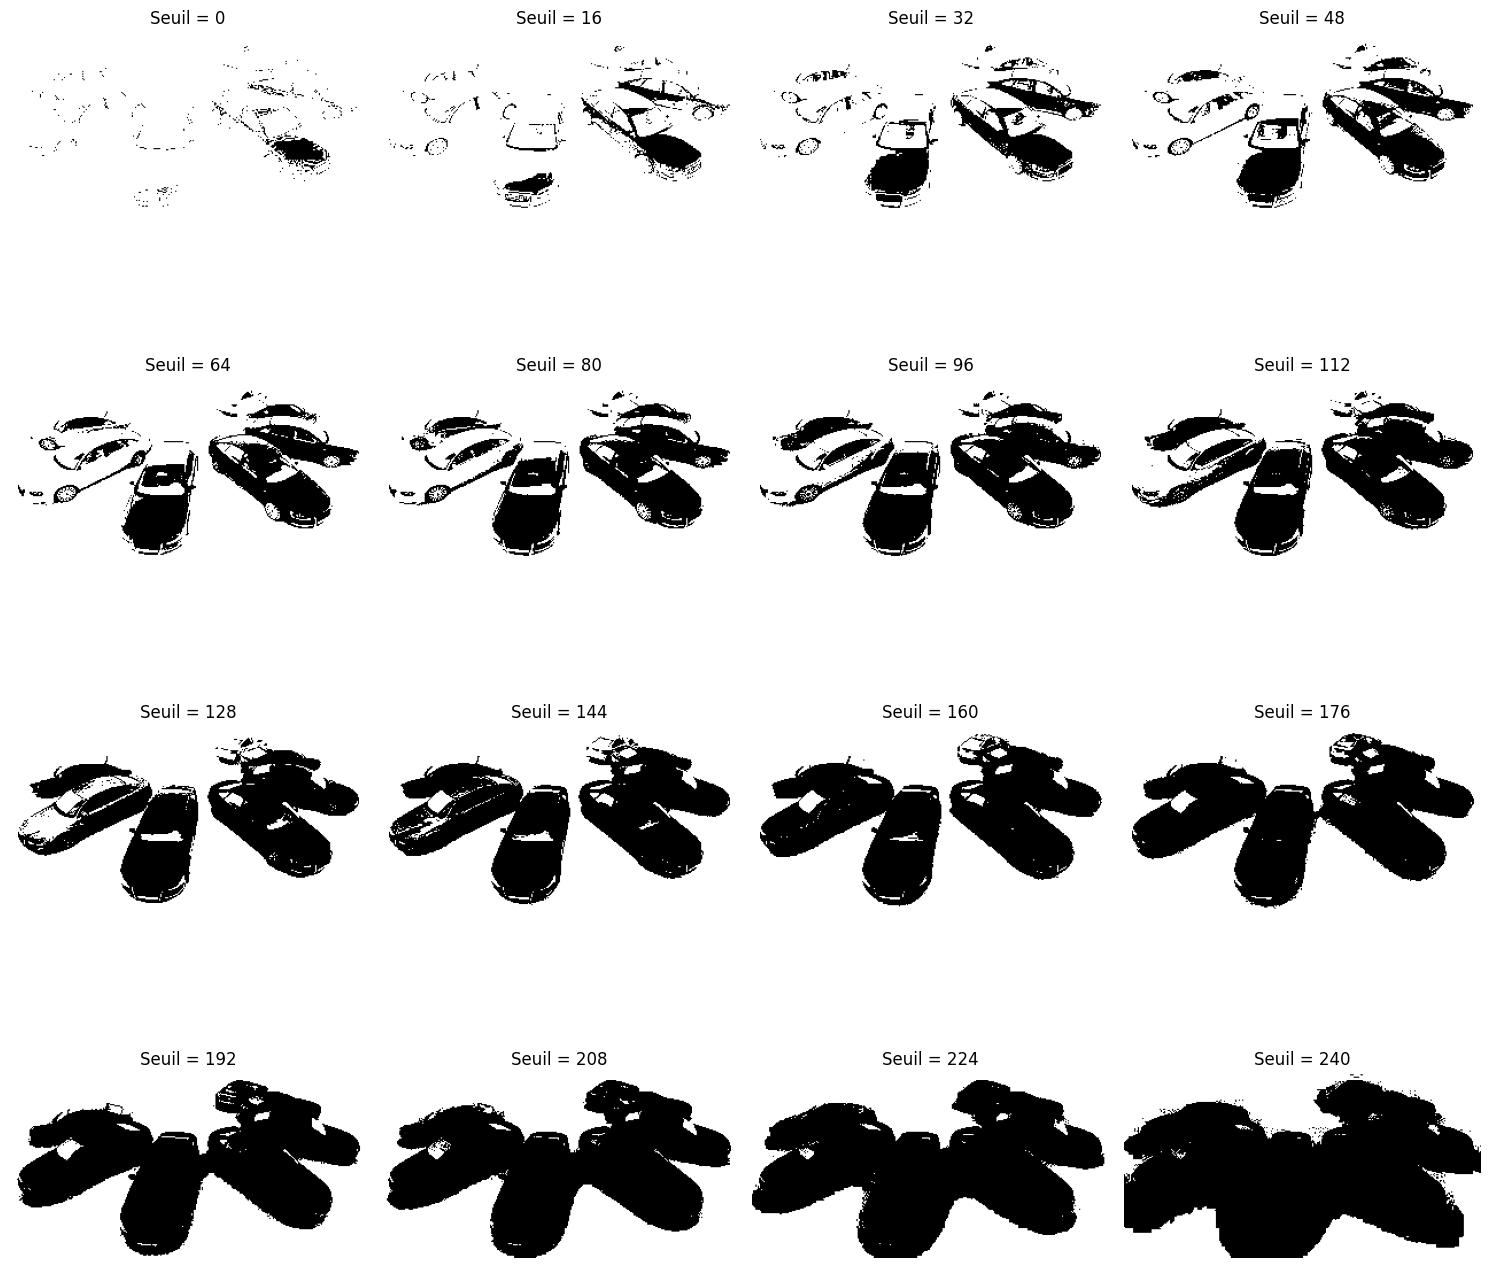

In [ ]:
# Créer une figure avec plusieurs sous-plots
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

# Varier le seuil manuellement entre 0 et 255
for i, ax in enumerate(axs.flatten()):
    # Calculer la valeur du seuil
    threshold_value = i * 16

    # Appliquer le seuil à l'image en niveaux de gris
    _, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Afficher l'image segmentée avec le seuil actuel
    ax.imshow(segmented_image, cmap='gray')
    ax.set_title(f'Seuil = {threshold_value}')
    ax.axis('off')

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


6. Sauvegarde des images segmentées avec différents seuils.

In [ ]:
import os

In [ ]:
# Créer un dossier pour sauvegarder les images segmentées
output_folder = "images_segmentées"
os.makedirs(output_folder, exist_ok=True)

# Varier le seuil manuellement entre 0 et 255 avec un pas de 16
for i in range(0, 256, 16):
    # Calculer la valeur du seuil
    threshold_value = i

    # Appliquer le seuil à l'image en niveaux de gris
    _, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Sauvegarder l'image segmentée avec le seuil actuel
    output_path = os.path.join(output_folder, f'segmented_image_threshold_{threshold_value}.png')
    cv2.imwrite(output_path, segmented_image)


7. Utilisons un Seuillage Automatique avec la Méthode d'Otsu.

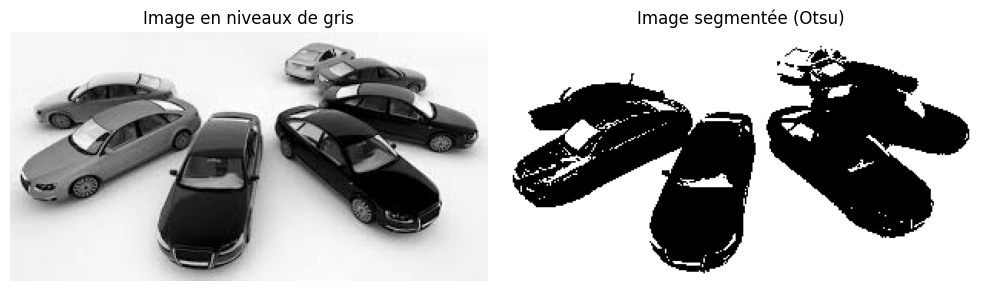

In [ ]:
# Appliquer le seuillage automatique avec la méthode d'Otsu
_, otsu_segmented_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Créer une figure avec deux sous-plots côte à côte
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Afficher l'image en niveaux de gris
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Image en niveaux de gris')
axs[0].axis('off')

# Afficher l'image segmentée avec la méthode d'Otsu
axs[1].imshow(otsu_segmented_image, cmap='gray')
axs[1].set_title('Image segmentée (Otsu)')
axs[1].axis('off')

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher la figure
plt.show()


8. Comparaison des resultats avec le seuillage manuel

Le seuillage automatique avec la méthode d'Otsu fournit un seuil optimal en se basant sur la distribution des intensités, tandis que le seuillage manuel offre un contrôle direct mais nécessite une sélection manuelle du seuil pour avoir le seuil optimal, avec des résultats dépendant du choix effectué.